# Medical Image Test - Vajira

# 'Medical image v3 - Resnet34 - data(500,250,250)'

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
PATH = "data/"
sz=64 # changed to 64 - 64X64 is good for satalite image analysis, Why? to study
arch=resnet34
bs=64

In [6]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data)

 92%|█████████▏| 58/63 [00:12<00:01,  4.48it/s, loss=7.8] 

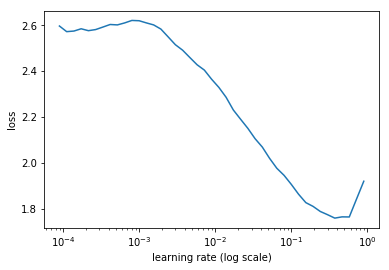

In [8]:
lrf=learn.lr_find()
learn.sched.plot()

In [9]:
lr = 0.2

In [10]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.57586    0.894095   0.7385    
    1      1.140973   0.580959   0.767                    
    2      0.762637   0.508608   0.7925                    
    3      0.748862   0.570516   0.768                     
    4      0.685499   0.550301   0.764                     
    5      0.582144   0.492036   0.8                       
    6      0.511385   0.469893   0.8095                    


[array([0.46989]), 0.8095]

In [11]:
lrs = np.array([lr/9,lr/3,lr])

In [12]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.949423   0.671176   0.687     
    1      0.816236   0.605376   0.7225                    
    2      0.631329   0.477257   0.7875                    
    3      0.655051   0.620711   0.701                     
    4      0.601015   0.590386   0.751                     
    5      0.476528   0.451057   0.8135                    
    6      0.396075   0.357046   0.852                     


[array([0.35705]), 0.852]

In [14]:
learn.save('resnet34_v3_1')

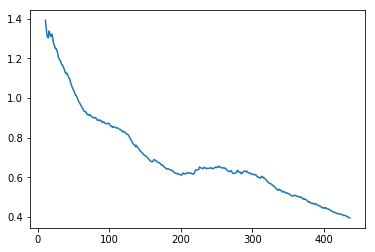

In [15]:
learn.sched.plot_loss()

In [19]:
sz=128

In [20]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)

In [22]:
learn.set_data(data)
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.503755   0.443313   0.8085    
    1      0.531633   0.46014    0.805                     
    2      0.509286   0.431122   0.811                     
    3      0.523786   0.457886   0.8025                    
    4      0.500453   0.435855   0.812                     
    5      0.473159   0.424364   0.8135                    
    6      0.466729   0.421141   0.818                     


[array([0.42114]), 0.818]

In [23]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)


epoch      trn_loss   val_loss   accuracy                  
    0      0.485051   0.347251   0.853     
    1      0.467148   0.387291   0.8235                    
    2      0.365428   0.276388   0.886                     
    3      0.425585   0.460071   0.8305                    
    4      0.382315   0.315395   0.866                     
    5      0.300598   0.262374   0.8905                    
    6      0.252948   0.253082   0.896                     


TypeError: must be str, not int

In [24]:
learn.save('resnet34_v3_128')

In [25]:
sz=256
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)

In [26]:
learn.set_data(data)
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.359115   0.323452   0.867     
    1      0.358537   0.330164   0.8695                    
    2      0.343895   0.328819   0.864                     
    3      0.359367   0.323059   0.8705                    
    4      0.349677   0.311515   0.877                     
    5      0.330983   0.30923    0.871                     
    6      0.318107   0.309056   0.869                     


[array([0.30906]), 0.869]

In [27]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save('resnet34_v3_256')

epoch      trn_loss   val_loss   accuracy                  
    0      0.431802   0.314204   0.8655    
    1      0.404481   0.309913   0.8735                    
    2      0.304211   0.243384   0.9035                    
    3      0.365092   0.452033   0.8225                    
    4      0.328181   0.26225    0.888                     
    5      0.256658   0.220644   0.91                      
    6      0.206924   0.218881   0.9115                    


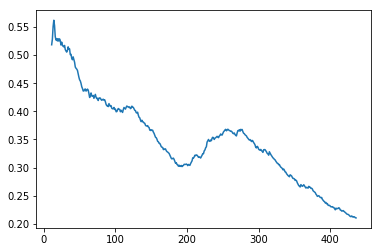

In [28]:
learn.sched.plot_loss()

In [29]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [30]:
accuracy_np(probs, y)

0.916

## Analyzing results

### Confusion matrix 

In [31]:
preds = np.argmax(probs, axis=1)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [33]:
plt.rcParams['figure.figsize'] = [15, 10]

[[232  16   0   0   0   0   2   0]
 [ 19 231   0   0   0   0   0   0]
 [  0   0 180   0   1  69   0   0]
 [  0   0   0 244   0   0   2   4]
 [  0   0   1   0 248   0   0   1]
 [  0   0  24   0   0 225   1   0]
 [  1   0   1   7   2   0 232   7]
 [  1   1   1   4   1   0   2 240]]


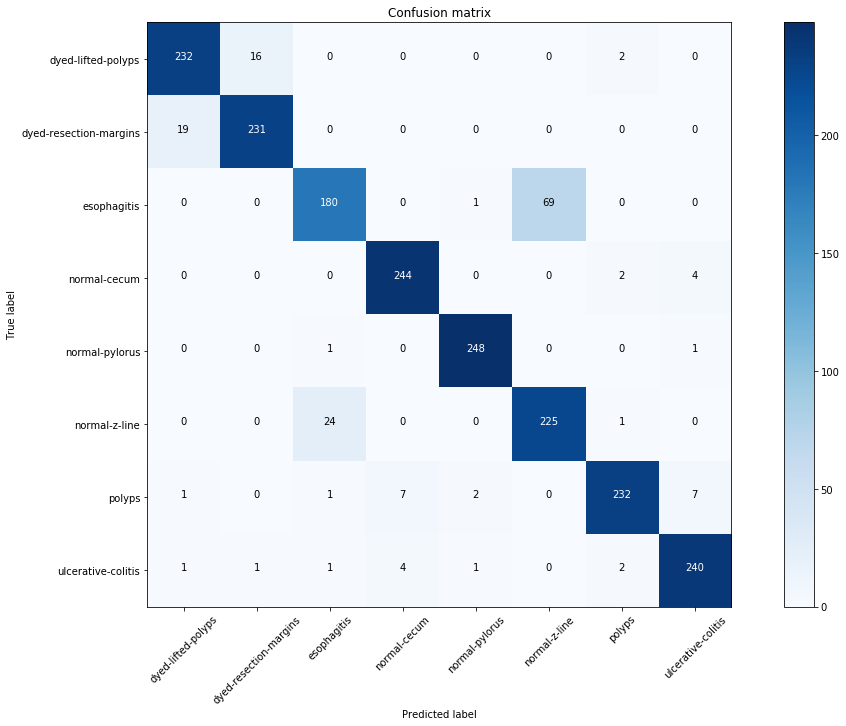

In [34]:
plot_confusion_matrix(cm, data.classes)

In [41]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, val_name='test', num_workers=4)

In [42]:
log_preds_t,y_t = learn.TTA()

In [43]:
probs_t = np.mean(np.exp(log_preds_t),0)
accuracy_np(probs_t, y_t)

0.9165

[[231  19   0   0   0   0   0   0]
 [ 17 233   0   0   0   0   0   0]
 [  0   0 183   0   1  66   0   0]
 [  0   0   0 243   0   0   1   6]
 [  0   0   0   0 250   0   0   0]
 [  0   0  25   0   0 224   1   0]
 [  1   0   1   8   2   0 231   7]
 [  1   1   1   4   1   0   4 238]]


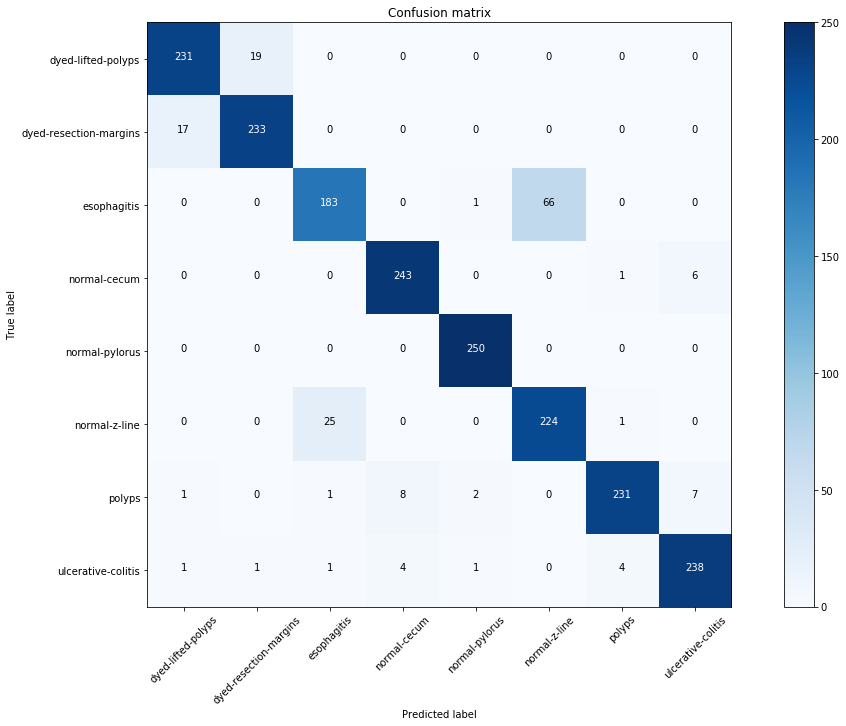

In [44]:
preds_t = np.argmax(probs_t, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_t, preds_t)
plot_confusion_matrix(cm, data.classes)